In [155]:
import nltk
import os
import numpy as np
import pandas as pd
from multiprocessing.pool import ThreadPool
import time



In [108]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [300]:
userhome = os.path.expanduser('~')
csvfile= userhome + r'/Desktop/cd_mumbai_complaints.csv'
df = pd.read_csv(csvfile)




In [301]:
df

,generic_id,created_at,complaint_status_id,voteup_count,city_id,ward_id,category_id,sub_category_id,civic_agency_id,title,description,location
0,W01730C147452,We are facing multiple issues related to road ...,4,28,2,946,15.0,66,22.0,8/5/16 9:45,"Potholes, Illegal Parking and Movement of Heav...","NSS Palkar Road, Asalfa Village, Ghatkopar Wes..."
1,W0960C153580,This is a really bad road. we need it cleaned ...,4,2,2,943,6.0,155,22.0,5/6/16 17:11,Bad road now with garbage,"21st Rd, MIDC Industrial Estate, Pandit Dinday..."
2,W01760C153649,This needs to be fixed asap.,2,40,2,946,21.0,84,25.0,5/6/16 21:16,Traffic issue that needs immediate attention,"5, JVLR, IIT Area, Powai, Mumbai, Maharashtra ..."
3,W01590C157072,We observed frequently heavy traffic at dahisa...,2,7,2,933,21.0,84,25.0,16-06-2016 19:42,Traffic jam at Dahisar check naka,"Western Express Hwy, Diamond Industrial Estate..."
4,W02080C164464,A pothole in front of Chand Shahwli Baba Darga...,3,19079,2,945,15.0,66,22.0,13-07-2016 12:57,Pothole on Pipeline Road,"Pipe Line Rd, Powai, IIT Area, Powai, Mumbai, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9293,W09460C398356,Garbage on foot path,1,0,2,946,6.0,155,22.0,8/9/18 11:11,Garbage on foot path,"Wing-B, Chandivali Rd, Yadav Nagar, Chandivali..."
9294,W09460C398357,Garbage near foot path,1,0,2,946,6.0,155,22.0,8/9/18 11:12,Garbage near foot path,"Manubhai Seetal Chawl, Chandivali Rd, Yadav Na..."
9295,W09550C398400,Please add sound barrier Along all the suburba...,1,0,2,955,313.0,314,28.0,8/9/18 12:37,Please add sound barrier Along all the suburba...,"Planet Godrej, Jacob Circle, Mumbai, Maharasht..."
9296,W09440C398666,Garbage on foot path,1,0,2,944,6.0,155,22.0,9/9/18 8:31,Garbage on foot path,"D-2, Pandit Madan Mohan Malaviya Rd, Mtnl Colo..."


In [302]:
import nltk
from nltk.tokenize import word_tokenize

In [303]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jarvis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [304]:
df1 = df[pd.notnull(df['created_at'])]
df1 = df1[pd.notnull(df['category_id'])]
df1 = df1[pd.notnull(df['civic_agency_id'])]







/Users/jarvis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jarvis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [305]:
df1.reset_index(inplace=True)

In [115]:
import nltk
from nltk.corpus import stopwords

In [116]:
for i in range(len(df1)):
    text = df1["created_at"][i] 
    df1["created_at"][i] = ' '.join([word for word in text.split() if word not in stopwords.words("english")])

/Users/jarvis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
from sklearn.feature_extraction.text import CountVectorizer
cvectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()



In [134]:
xt = vectorizer.fit_transform(df1["created_at"])
xc = cvectorizer.fit_transform(df1["created_at"])

In [135]:
len(vectorizer.vocabulary_) 

6964

In [139]:
len(cvectorizer.vocabulary_) 

6964

In [140]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
train_vectors, test_vectors, y_train, y_test = train_test_split( xt, df1["sub_category_id"] , test_size=0.2, random_state=42)

In [173]:
start = time.time()
model1 = XGBClassifier()
model1.fit(train_vectors, y_train)
print(model1)
y_pred = model1.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
end = time.time()

print(f"Runtime of the program is {end - start}")


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
Accuracy: 90.83%
Runtime of the program is 136.02878212928772


In [174]:
train_vectors, test_vectors, y_train, y_test = train_test_split( xc, df1["sub_category_id"] , test_size=0.2, random_state=42)

In [175]:
start = time.time()
model1a = XGBClassifier()
model1a.fit(train_vectors, y_train)
print(model1a)
y_pred = model1a.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
end = time.time()

print(f"Runtime of the program is {end - start}")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
Accuracy: 90.95%
Runtime of the program is 130.25090098381042


In [176]:
train_vectors , test_vectors, y_train, y_test = train_test_split( xt , df1["category_id"] , test_size=0.2, random_state=42)

In [177]:
start = time.time()
model2 = XGBClassifier()
model2.fit(train_vectors, y_train)
print(model2)
y_pred = model2.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
end = time.time()

print(f"Runtime of the program is {end - start}")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
Accuracy: 93.23%
Runtime of the program is 29.859846830368042


In [178]:
train_vectors , test_vectors, y_train, y_test = train_test_split( xc , df1["category_id"] , test_size=0.2, random_state=42)

In [179]:
start = time.time()
model2a = XGBClassifier()
model2a.fit(train_vectors, y_train)
print(model2a)
y_pred = model2a.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
end = time.time()

print(f"Runtime of the program is {end - start}")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
Accuracy: 93.65%
Runtime of the program is 27.748297929763794


In [180]:
train_vectors , test_vectors, y_train, y_test = train_test_split( xt , df1["civic_agency_id"] , test_size=0.2, random_state=42)

In [181]:
start = time.time()
model3 = XGBClassifier()
model3.fit(train_vectors, y_train)
print(model3)
y_pred = model3.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
end = time.time()

print(f"Runtime of the program is {end - start}")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
Accuracy: 96.28%
Runtime of the program is 12.234955072402954


In [182]:
train_vectors , test_vectors, y_train, y_test = train_test_split( xc , df1["civic_agency_id"] , test_size=0.2, random_state=42)

In [183]:
start = time.time()
model3a = XGBClassifier()
model3a.fit(train_vectors, y_train)
print(model3a)
y_pred = model3a.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
end = time.time()

print(f"Runtime of the program is {end - start}")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
Accuracy: 96.28%
Runtime of the program is 8.82749629020691


In [186]:
vectorizer_init = vectorizer.vocabulary_

In [184]:
import pickle 

In [185]:
Sub_Category = pickle.dumps(model1) 

In [187]:
Category = pickle.dumps(model2)

In [189]:
Civic_Agency_Id = pickle.dumps(model3)

In [190]:
from sklearn.externals import joblib 

/Users/jarvis/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [216]:
joblib.dump(model1,  'Sub_Category.sav')

['Sub_Category.sav']

In [217]:
joblib.dump(model2,  'Category.sav')

['Category.sav']

In [218]:
joblib.dump(model3,  'Civic_Agency_Id.sav')

['Civic_Agency_Id.sav']

In [219]:
pickle.dump( vectorizer, open( "tfidf.pickle", "wb"))

In [204]:
y_pred


array([28., 28., 22., ..., 28., 28., 28.])

In [208]:
len(vectorizer.vocabulary_)

6964

In [214]:
loaded_model = joblib.load( userhome + r'/Desktop/Models/Civic_Agency_Id.sav')

In [215]:
print(loaded_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)


In [220]:
csvfile= userhome + r'/Desktop/cd_categories.csv'
cat = pd.read_csv(csvfile)



In [221]:
indToCat ={}

In [222]:
for i in range(len(cat)):
    indToCat[cat["id"][i]]=cat["title"][i]

In [223]:
indToCat[1]

'Certificates'

In [224]:
pickle.dump( indToCat, open( "indToCat.pickle", "wb"))

In [226]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

     |████████████████████████████████| 160 kB 5.8 MB/s eta 0:00:01


In [227]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [233]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in df1.description: 
    val = str(val) 

    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "

In [236]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

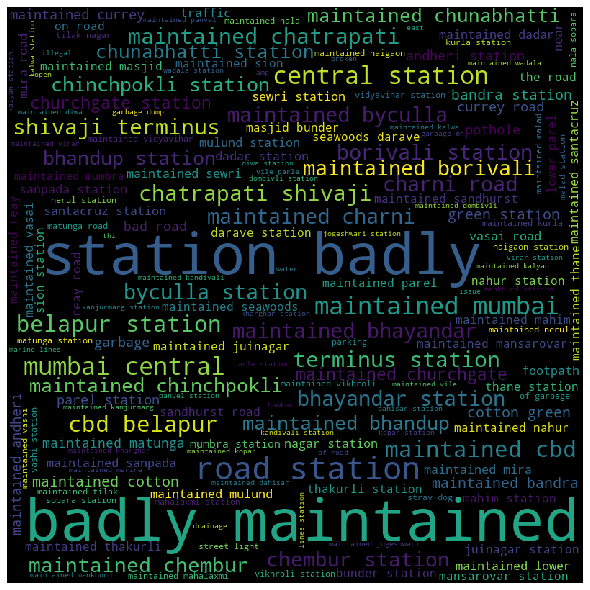

In [237]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [239]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in df1.created_at: 
    val = str(val) 

    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "

In [240]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

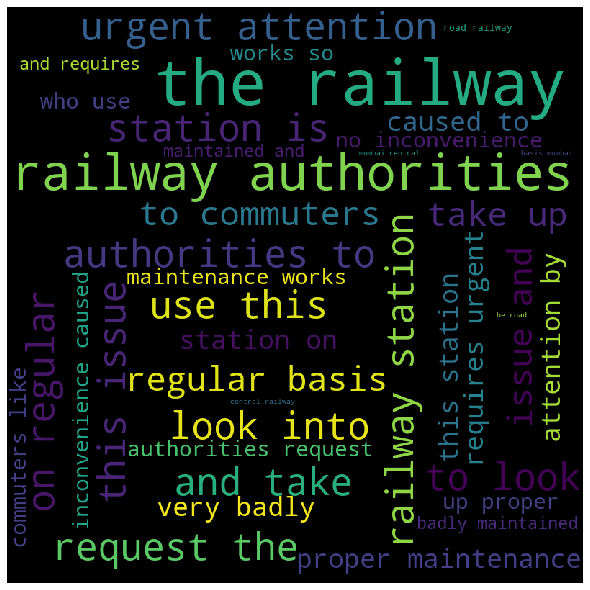

In [241]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

---------------category_id-------------------


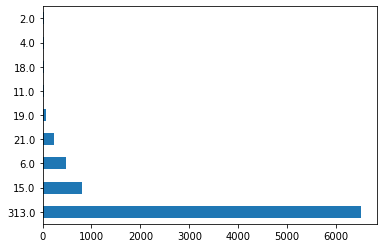

In [273]:
df1['category_id'].value_counts()[:2].plot(kind='barh')
print("---------------category_id-------------------")




--------------sub_category_id----------------


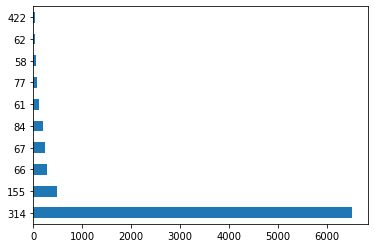

In [263]:

df1['sub_category_id'].value_counts()[:10].plot(kind='barh')
print("--------------sub_category_id----------------")


-----------------civic_agency_id---------------


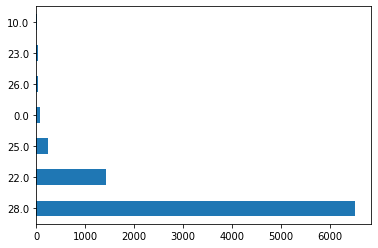

In [272]:
df1['civic_agency_id'].value_counts()[:10].plot(kind='barh')
print("-----------------civic_agency_id---------------")





In [276]:
totalCategoryClass = len(df1["category_id"].unique())

In [278]:
totalSubCategoryClass = len(df1["sub_category_id"].unique())

In [279]:
totalCivicAgencyClass = len(df1["civic_agency_id"].unique())

In [280]:
totalCategoryClass

21

In [281]:
totalSubCategoryClass

61

In [282]:
totalCivicAgencyClass

10

In [289]:
minlen = 1000
maxlen = 0
avglen =0
total_len=0
c=0
for i in range(len(df1)):
    temp_len = len(df1["created_at"][i])
    c+=1
    total_len+=temp_len
    
    if temp_len > maxlen:
        maxlen = temp_len
    
    if minlen > temp_len:
        minlen =temp_len
        
    
    


In [290]:
minlen

1

In [291]:
maxlen

2616

In [292]:
avglen = (total_len)/c

In [296]:
avglen = (total_len)/c
print(avglen)

288.28897978825796


In [306]:
train_vectors , test_vectors, y_train, y_test = train_test_split( xt , df1["category_id"] , test_size=0.2, random_state=42)

In [308]:
yhat = np.argmax(model2.predict(test_vectors), axis = -1)

In [312]:
from sklearn.metrics import f1_score, precision_score, recall_score



In [321]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score






In [327]:
y_pred = model2.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)


Accuracy: 93.23%
Confusion Matrix

[[   0    0    0    0    0    0    0    2    0    0    0    0    0    0
     0    0    1    0]
 [   0    0    0    0    0    0    0    2    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    1    0    0    0    0    3    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0   83    0    0    0   22    0    0    2    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    4    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    1    1    0    0    5    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    2    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    1    7    0    0    0  140    1    0    7    0    4    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    4    1    0    0    0    1    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    7    0    9    0    0    0    0
     0    0    0    0]
 [   0    0    

In [337]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Precision: {:.3f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.3f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.93

Precision: 0.928
Recall: 0.932
F1-score: 0.926


In [338]:
from sklearn.metrics import classification_report


In [339]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         2.0      0.000     0.000     0.000         3
         3.0      0.000     0.000     0.000         2
         4.0      0.500     0.250     0.333         4
         6.0      0.883     0.776     0.826       107
         9.0      0.000     0.000     0.000         4
        11.0      0.000     0.000     0.000         7
        12.0      0.000     0.000     0.000         2
        15.0      0.633     0.875     0.735       160
        18.0      0.500     0.167     0.250         6
        19.0      1.000     0.562     0.720        16
        21.0      0.735     0.581     0.649        43
        22.0      0.000     0.000     0.000         3
        23.0      0.250     0.667     0.364         3
       210.0      0.000     0.000     0.000         2
       313.0      1.000     0.997     0.998      1297
       382.0      0.000     0.000     0.000         3
       454.0      0.500     0.500     0.500         2
       470.0      0.000    

In [341]:
train_vectors, test_vectors, y_train, y_test = train_test_split( xc, df1["sub_category_id"] , test_size=0.2, random_state=42)

In [342]:
y_pred = model1.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Precision: {:.3f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.3f}'.format(f1_score(y_test, y_pred, average='weighted')))

Accuracy: 89.75%
Confusion Matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Accuracy: 0.90

Precision: 0.879
Recall: 0.897
F1-score: 0.886


/Users/jarvis/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [343]:
train_vectors , test_vectors, y_train, y_test = train_test_split( xt , df1["civic_agency_id"] , test_size=0.2, random_state=42)

In [344]:
y_pred = model3.predict(test_vectors)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Precision: {:.3f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.3f}'.format(f1_score(y_test, y_pred, average='weighted')))

Accuracy: 96.28%
Confusion Matrix

[[   2    0   10    0    0    1    0    0]
 [   0    0    1    0    0    0    0    0]
 [   1    0  291    1    0    6    0    0]
 [   0    0    3    1    0    0    0    0]
 [   0    0    2    0    0    0    0    0]
 [   0    0   26    0    0   19    0    0]
 [   0    0    7    0    0    0    0    0]
 [   0    0    4    0    0    0    0 1293]]

Accuracy: 0.96

Precision: 0.955
Recall: 0.963
F1-score: 0.956
